In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

import warnings
warnings.filterwarnings('ignore')

# Project description

We have two files: airports and routes

airports.csv contains information about airports like: names, ids, longitudes, latitudes, ...

routes.csv contains all the non-stop routes between airports.

Your task is to create some statistics on this data. To this end, you must:

1- select a region (Asia, Europe, ..) and extract the corresponding data from each file;

2- use the longitude/latitude values from the airports file to update the data extracted from routes file by adding the distance attribute for each direct route;

3- use all needed algorithms to define statistics on the airports, like the shortest path between two airports, the importance of an airport (number of routes from and  to the airport), and other statistics you judge important in the context.




In [2]:
!ls

airports.csv  env  index.ipynb	routes.csv


# Step 1. Preparing data

## Reading files and creating dataframes to prepare data

In [3]:
adf = pd.read_csv("airports.csv")

In [4]:
adf

Airport ID                                         Name          City  \
0              1                               Goroka Airport        Goroka   
1              2                               Madang Airport        Madang   
2              3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3              4                               Nadzab Airport        Nadzab   
4              5  Port Moresby Jacksons International Airport  Port Moresby   
...          ...                                          ...           ...   
7693       14106                          Rogachyovo Air Base        Belaya   
7694       14107                        Ulan-Ude East Airport      Ulan Ude   
7695       14108                         Krechevitsy Air Base      Novgorod   
7696       14109                  Desierto de Atacama Airport       Copiapo   
7697       14110                           Melitopol Air Base     Melitopol   

               Country IATA  ICAO   Latitude   Longitude  Altitude Timezone  \
0     Papua New Guinea  GKA  AYGA  -6.081690  145.391998      5282       10   
1     Papua New Guinea  MAG  AYMD  -5.207080  145.789001        20       10   
2     Papua New Guinea  HGU  AYMH  -5.826790  144.296005      5388       10   
3     Papua New Guinea  LAE  AYNZ  -6.569803  146.725977       239       10   
4     Papua New Guinea  POM  AYPY  -9.443380  147.220001       146       10   
...                ...  ...   ...        ...         ...       ...      ...   
7693            Russia   \N  ULDA  71.616699   52.478298       272       \N   
7694            Russia   \N  XIUW  51.849998  107.737999      1670       \N   
7695            Russia   \N  ULLK  58.625000   31.385000        85       \N   
7696             Chile  CPO  SCAT -27.261200  -70.779198       670       \N   
7697           Ukraine   \N  UKDM  46.880001   35.305000         0       \N   

     DST Tz database time zone     Type       Source  
0      U  Pacific/Port_Moresby  airport  OurAirports  
1      U  Pacific/Port_Moresby  airport  OurAirports  
2      U  Pacific/Port_Moresby  airport  OurAirports  
3      U  Pacific/Port_Moresby  airport  OurAirports  
4      U  Pacific/Port_Moresby  airport  OurAirports  
...   ..                   ...      ...          ...  
7693  \N                    \N  airport  OurAirports  
7694  \N                    \N  airport  OurAirports  
7695  \N                    \N  airport  OurAirports  
7696  \N                    \N  airport  OurAirports  
7697  \N                    \N  airport  OurAirports  

[7698 rows x 14 columns]

In [5]:
rdf = pd.read_csv("routes.csv")

In [6]:
rdf

Airline Airline ID Source airport Source airport ID Destination airport  \
0          2B        410            AER              2965                 KZN   
1          2B        410            ASF              2966                 KZN   
2          2B        410            ASF              2966                 MRV   
3          2B        410            CEK              2968                 KZN   
4          2B        410            CEK              2968                 OVB   
...       ...        ...            ...               ...                 ...   
67658      ZL       4178            WYA              6334                 ADL   
67659      ZM      19016            DME              4029                 FRU   
67660      ZM      19016            FRU              2912                 DME   
67661      ZM      19016            FRU              2912                 OSS   
67662      ZM      19016            OSS              2913                 FRU   

      Destination airport ID Codeshare  Stops Equipment  
0                       2990       NaN      0       CR2  
1                       2990       NaN      0       CR2  
2                       2962       NaN      0       CR2  
3                       2990       NaN      0       CR2  
4                       4078       NaN      0       CR2  
...                      ...       ...    ...       ...  
67658                   3341       NaN      0       SF3  
67659                   2912       NaN      0       734  
67660                   4029       NaN      0       734  
67661                   2913       NaN      0       734  
67662                   2912       NaN      0       734  

[67663 rows x 9 columns]

In [7]:
adf.head()

Airport ID                                         Name          City  \
0           1                               Goroka Airport        Goroka   
1           2                               Madang Airport        Madang   
2           3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3           4                               Nadzab Airport        Nadzab   
4           5  Port Moresby Jacksons International Airport  Port Moresby   

            Country IATA  ICAO  Latitude   Longitude  Altitude Timezone DST  \
0  Papua New Guinea  GKA  AYGA -6.081690  145.391998      5282       10   U   
1  Papua New Guinea  MAG  AYMD -5.207080  145.789001        20       10   U   
2  Papua New Guinea  HGU  AYMH -5.826790  144.296005      5388       10   U   
3  Papua New Guinea  LAE  AYNZ -6.569803  146.725977       239       10   U   
4  Papua New Guinea  POM  AYPY -9.443380  147.220001       146       10   U   

  Tz database time zone     Type       Source  
0  Pacific/Port_Moresby  airport  OurAirports  
1  Pacific/Port_Moresby  airport  OurAirports  
2  Pacific/Port_Moresby  airport  OurAirports  
3  Pacific/Port_Moresby  airport  OurAirports  
4  Pacific/Port_Moresby  airport  OurAirports

In [8]:
rdf.head()

Airline Airline ID Source airport Source airport ID Destination airport  \
0      2B        410            AER              2965                 KZN   
1      2B        410            ASF              2966                 KZN   
2      2B        410            ASF              2966                 MRV   
3      2B        410            CEK              2968                 KZN   
4      2B        410            CEK              2968                 OVB   

  Destination airport ID Codeshare  Stops Equipment  
0                   2990       NaN      0       CR2  
1                   2990       NaN      0       CR2  
2                   2962       NaN      0       CR2  
3                   2990       NaN      0       CR2  
4                   4078       NaN      0       CR2

## Selecting all airpots and routes which are in America

In [9]:
adf.head()

Airport ID                                         Name          City  \
0           1                               Goroka Airport        Goroka   
1           2                               Madang Airport        Madang   
2           3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3           4                               Nadzab Airport        Nadzab   
4           5  Port Moresby Jacksons International Airport  Port Moresby   

            Country IATA  ICAO  Latitude   Longitude  Altitude Timezone DST  \
0  Papua New Guinea  GKA  AYGA -6.081690  145.391998      5282       10   U   
1  Papua New Guinea  MAG  AYMD -5.207080  145.789001        20       10   U   
2  Papua New Guinea  HGU  AYMH -5.826790  144.296005      5388       10   U   
3  Papua New Guinea  LAE  AYNZ -6.569803  146.725977       239       10   U   
4  Papua New Guinea  POM  AYPY -9.443380  147.220001       146       10   U   

  Tz database time zone     Type       Source  
0  Pacific/Port_Moresby  airport  OurAirports  
1  Pacific/Port_Moresby  airport  OurAirports  
2  Pacific/Port_Moresby  airport  OurAirports  
3  Pacific/Port_Moresby  airport  OurAirports  
4  Pacific/Port_Moresby  airport  OurAirports

In [10]:
# First part of 'America/Godthab' is region. We split string into two parts and selecting first region part 
adf['reg'] = adf['Tz database time zone'].str.split('/').str[0]

In [11]:
# check which regions have been found by splitting
adf['reg'].unique()

array(['Pacific', 'America', 'Atlantic', 'Africa', 'Europe', 'Arctic',
       'Indian', 'Asia', '\\N', 'Antarctica', 'Australia'], dtype=object)

In [12]:
# selecting all regions which are in America
aadf = adf[adf['reg'] == 'America']

In [13]:
aadf

Airport ID                                            Name  \
6              7                              Narsarsuaq Airport   
7              8                         Godthaab / Nuuk Airport   
8              9                           Kangerlussuaq Airport   
9             10                                  Thule Air Base   
20            21                         Sault Ste Marie Airport   
...          ...                                             ...   
6651        9806  Cheraw Municipal Airport/Lynch Bellinger Field   
6652        9808                      Wauchula Municipal Airport   
6669        9847                     Conway Horry County Airport   
6722       10114              Chichen Itza International Airport   
6735       10135              San Cristobal de las Casas Airport   

                            City        Country IATA  ICAO   Latitude  \
6                   Narssarssuaq      Greenland  UAK  BGBW  61.160500   
7                       Godthaab      Greenland  GOH  BGGH  64.190903   
8                    Sondrestrom      Greenland  SFJ  BGSF  67.012222   
9                          Thule      Greenland  THU  BGTL  76.531197   
20            Sault Sainte Marie         Canada  YAM  CYAM  46.485001   
...                          ...            ...  ...   ...        ...   
6651                      Cheraw  United States  HCW  KCQW  34.712898   
6652                     Wuchula  United States   \N  KCHN  27.514900   
6669                      Conway  United States   \N  KHYW  33.828499   
6722                Chichen Itza         Mexico  CZA  MMCT  20.641300   
6735  San Cristobal de las Casas         Mexico  SZT  MMSC  16.690300   

      Longitude  Altitude Timezone DST Tz database time zone     Type  \
6    -45.425999       112       -3   E       America/Godthab  airport   
7    -51.678101       283       -3   E       America/Godthab  airport   
8    -50.711603       165       -3   E       America/Godthab  airport   
9    -68.703201       251       -4   E         America/Thule  airport   
20   -84.509399       630       -5   A       America/Toronto  airport   
...         ...       ...      ...  ..                   ...      ...   
6651 -79.957001       239       -5   A      America/New_York  airport   
6652 -81.880501       106       -5   A      America/New_York  airport   
6669 -79.122200        35       -5   A      America/New_York  airport   
6722 -88.446198       102       -6   S   America/Mexico_City  airport   
6735 -92.530098      7707       -6   N   America/Mexico_City  airport   

           Source      reg  
6     OurAirports  America  
7     OurAirports  America  
8     OurAirports  America  
9     OurAirports  America  
20    OurAirports  America  
...           ...      ...  
6651  OurAirports  America  
6652  OurAirports  America  
6669  OurAirports  America  
6722  OurAirports  America  
6735  OurAirports  America  

[2593 rows x 15 columns]

In [14]:
rdf.head()

Airline Airline ID Source airport Source airport ID Destination airport  \
0      2B        410            AER              2965                 KZN   
1      2B        410            ASF              2966                 KZN   
2      2B        410            ASF              2966                 MRV   
3      2B        410            CEK              2968                 KZN   
4      2B        410            CEK              2968                 OVB   

  Destination airport ID Codeshare  Stops Equipment  
0                   2990       NaN      0       CR2  
1                   2990       NaN      0       CR2  
2                   2962       NaN      0       CR2  
3                   2990       NaN      0       CR2  
4                   4078       NaN      0       CR2

In [15]:
aadf.head()

Airport ID                     Name                City    Country IATA  \
6            7       Narsarsuaq Airport        Narssarssuaq  Greenland  UAK   
7            8  Godthaab / Nuuk Airport            Godthaab  Greenland  GOH   
8            9    Kangerlussuaq Airport         Sondrestrom  Greenland  SFJ   
9           10           Thule Air Base               Thule  Greenland  THU   
20          21  Sault Ste Marie Airport  Sault Sainte Marie     Canada  YAM   

    ICAO   Latitude  Longitude  Altitude Timezone DST Tz database time zone  \
6   BGBW  61.160500 -45.425999       112       -3   E       America/Godthab   
7   BGGH  64.190903 -51.678101       283       -3   E       America/Godthab   
8   BGSF  67.012222 -50.711603       165       -3   E       America/Godthab   
9   BGTL  76.531197 -68.703201       251       -4   E         America/Thule   
20  CYAM  46.485001 -84.509399       630       -5   A       America/Toronto   

       Type       Source      reg  
6   airport  OurAirports  America  
7   airport  OurAirports  America  
8   airport  OurAirports  America  
9   airport  OurAirports  America  
20  airport  OurAirports  America

In [16]:
len(aadf[aadf['IATA'] == 'AER'])#for example if aadf equal AER it will return none

0

In [17]:
rdf.head()

Airline Airline ID Source airport Source airport ID Destination airport  \
0      2B        410            AER              2965                 KZN   
1      2B        410            ASF              2966                 KZN   
2      2B        410            ASF              2966                 MRV   
3      2B        410            CEK              2968                 KZN   
4      2B        410            CEK              2968                 OVB   

  Destination airport ID Codeshare  Stops Equipment  
0                   2990       NaN      0       CR2  
1                   2990       NaN      0       CR2  
2                   2962       NaN      0       CR2  
3                   2990       NaN      0       CR2  
4                   4078       NaN      0       CR2

In [18]:
# we creating column which indicates that if airport is in America or not.
# It's done by finding rows for each speficic airport abbreviation
rdf['in_america'] = rdf['Source airport'].apply(lambda a: len(aadf[aadf['IATA'] == a].index) != 0)

In [19]:
ardf = rdf[rdf['in_america']] # we selecting all routes in america

In [20]:
ardf

Airline Airline ID Source airport Source airport ID Destination airport  \
63         2I       8359            AYP              2786                 LIM   
64         2I       8359            CUZ              2812                 LIM   
65         2I       8359            CUZ              2812                 PEM   
66         2I       8359            HUU              6067                 LIM   
67         2I       8359            IQT              2801                 PCL   
...       ...        ...            ...               ...                 ...   
67565      ZK       2607            SHR              5769                 DEN   
67566      ZK       2607            SOW              7078                 FMN   
67567      ZK       2607            SOW              7078                 PHX   
67569      ZK       2607            VIS              7121                 LAX   
67570      ZK       2607            WRL              5777                 CYS   

      Destination airport ID Codeshare  Stops Equipment  in_america  
63                      2789       NaN      0       142        True  
64                      2789       NaN      0   142 141        True  
65                      2808       NaN      0       142        True  
66                      2789       NaN      0       141        True  
67                      2781       NaN      0       143        True  
...                      ...       ...    ...       ...         ...  
67565                   3751       NaN      0       EM2        True  
67566                   3743       NaN      0       BE1        True  
67567                   3462       NaN      0       BE1        True  
67569                   3484       NaN      0       BE1        True  
67570                   3804       NaN      0   BEH BE1        True  

[20273 rows x 10 columns]

## Calcuting the distance between two airpots by using Haversine formula

In [15]:
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    result = 6367 * 2 * np.arcsin(np.sqrt(a))
    return result

In [21]:
ardf.head()

Airline Airline ID Source airport Source airport ID Destination airport  \
63      2I       8359            AYP              2786                 LIM   
64      2I       8359            CUZ              2812                 LIM   
65      2I       8359            CUZ              2812                 PEM   
66      2I       8359            HUU              6067                 LIM   
67      2I       8359            IQT              2801                 PCL   

   Destination airport ID Codeshare  Stops Equipment  in_america  
63                   2789       NaN      0       142        True  
64                   2789       NaN      0   142 141        True  
65                   2808       NaN      0       142        True  
66                   2789       NaN      0       141        True  
67                   2781       NaN      0       143        True

In [22]:
aadf.head()

Airport ID                     Name                City    Country IATA  \
6            7       Narsarsuaq Airport        Narssarssuaq  Greenland  UAK   
7            8  Godthaab / Nuuk Airport            Godthaab  Greenland  GOH   
8            9    Kangerlussuaq Airport         Sondrestrom  Greenland  SFJ   
9           10           Thule Air Base               Thule  Greenland  THU   
20          21  Sault Ste Marie Airport  Sault Sainte Marie     Canada  YAM   

    ICAO   Latitude  Longitude  Altitude Timezone DST Tz database time zone  \
6   BGBW  61.160500 -45.425999       112       -3   E       America/Godthab   
7   BGGH  64.190903 -51.678101       283       -3   E       America/Godthab   
8   BGSF  67.012222 -50.711603       165       -3   E       America/Godthab   
9   BGTL  76.531197 -68.703201       251       -4   E         America/Thule   
20  CYAM  46.485001 -84.509399       630       -5   A       America/Toronto   

       Type       Source      reg  
6   airport  OurAirports  America  
7   airport  OurAirports  America  
8   airport  OurAirports  America  
9   airport  OurAirports  America  
20  airport  OurAirports  America

In [16]:
# we creating new column which is distance between two airpots

def compute_dist(r):
    # function find two rows which contains coordinate data of source and destination airpots 
    # and then pass them to haversine function. Sometimes there are cases when we dont have rows with data, 
    # hence then handled by returning NONE in this case
    
    try:
        src, dst = r['Source airport'], r['Destination airport']
        src_data = aadf[aadf['IATA'] == src][['Latitude', 'Longitude']].values
        lon1, lat1 = src_data[0].tolist()
        dst_data = aadf[aadf['IATA'] == dst][['Latitude', 'Longitude']].values
        lon2, lat2 = dst_data[0].tolist()
        return haversine(lon1, lat1, lon2, lat2)
    except:
        return None

ardf['distance'] = ardf.apply(compute_dist, axis=1)

In [17]:
# we droping all rows where distance is None
ardf = ardf[ardf.isnull().any(axis=1)]

In [18]:
# Selecting relevant columns for building our graph. Also we rename them to work in the easier way

ardf = ardf[['Source airport', 'Destination airport', 'distance']].rename(
    columns={
        'Source airport': 'source', 
        'Destination airport': "destination", 
        'distance': "distance"
    }
)

In [19]:
ardf

source destination    distance
63       AYP         LIM  324.848465
64       CUZ         LIM  576.829573
65       CUZ         PEM  303.082220
66       HUU         LIM  115.024253
67       IQT         PCL  199.177123
...      ...         ...         ...
67565    SHR         DEN  296.170975
67566    SOW         FMN  216.911463
67567    SOW         PHX  225.358353
67569    VIS         LAX  168.109003
67570    WRL         CYS  359.668966

[14059 rows x 3 columns]

# Step 2. Building graph and finding stats

## Building graph and plotting it

In [20]:
# We building our graph

G = nx.from_pandas_edgelist(
    ardf, source='source', target='destination', 
    edge_attr=True, create_using=nx.DiGraph
)

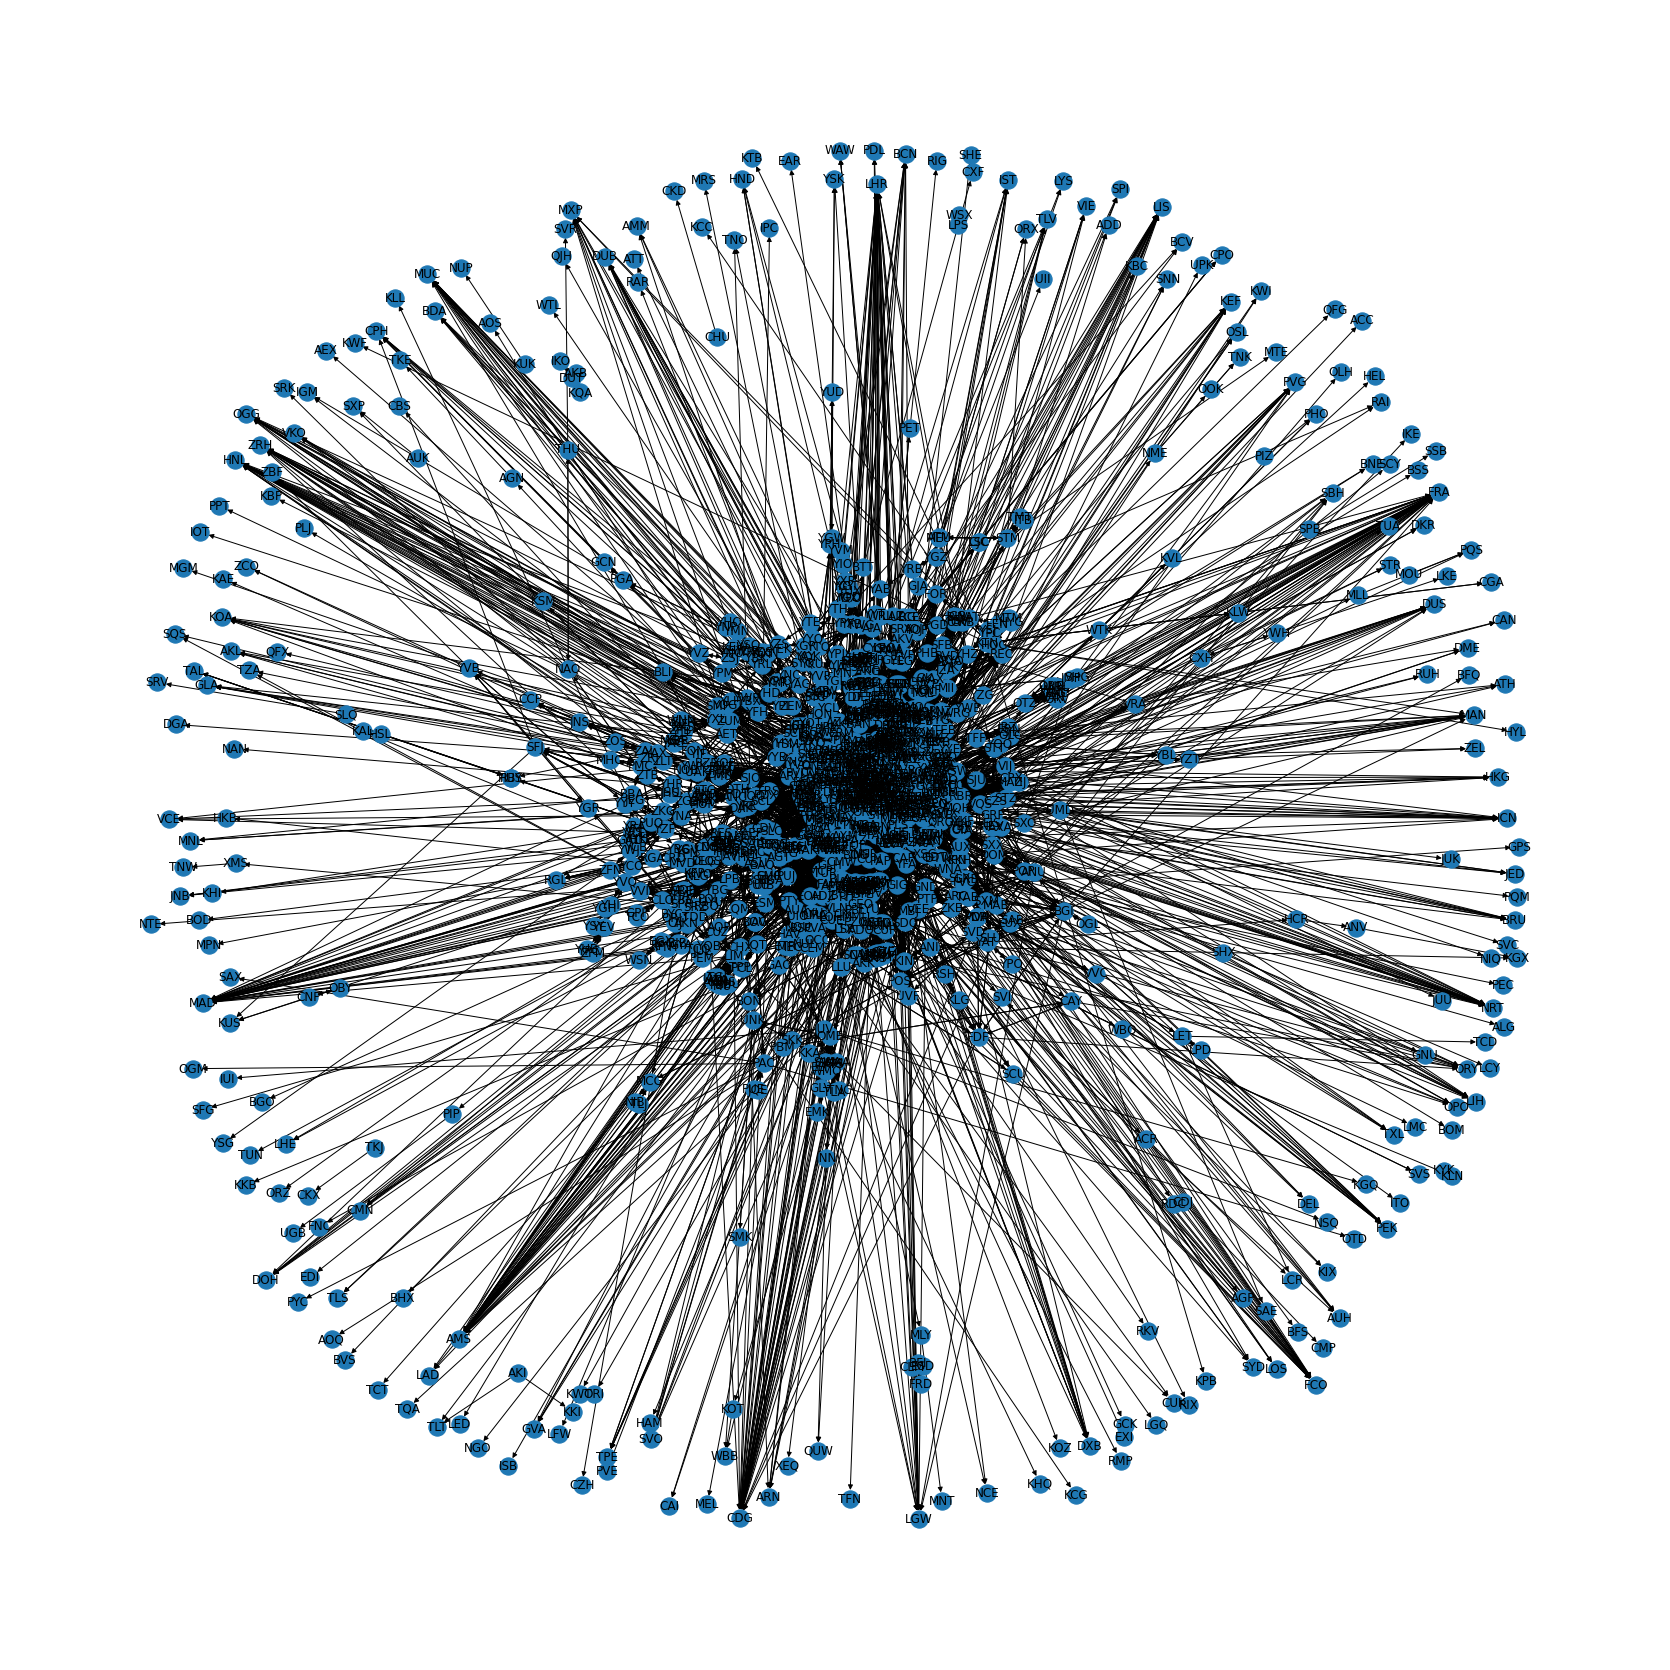

In [21]:
plt.figure(figsize=(23, 23))
nx.draw(G, with_labels=True)

## Finding closeness centrality

In [24]:
ccent_data = nx.closeness_centrality(G)
sorted_ccent = dict(sorted(ccent_data.items(),key=lambda x:x[1]))

In [25]:
# we shows the top nodes with highest closeness centrality values

def show_tops(dataset, tops=10):
    nodes = tuple(dataset.keys())[-tops:]
    for node in nodes:
        ccent_value = dataset.get(node)
        print(f'For {node} closeness_centrality is {ccent_value}')

show_tops(sorted_ccent)

For LAS closeness_centrality is 0.30875191972282057
For MCO closeness_centrality is 0.3090957414597057
For EWR closeness_centrality is 0.3100163542414174
For ORD closeness_centrality is 0.3121079188502425
For LAX closeness_centrality is 0.3137543057620374
For JFK closeness_centrality is 0.31722054380664655
For YYZ closeness_centrality is 0.31855544280506776
For ATL closeness_centrality is 0.32125923128566636
For MIA closeness_centrality is 0.3251479607545674
For DFW closeness_centrality is 0.326678669082953


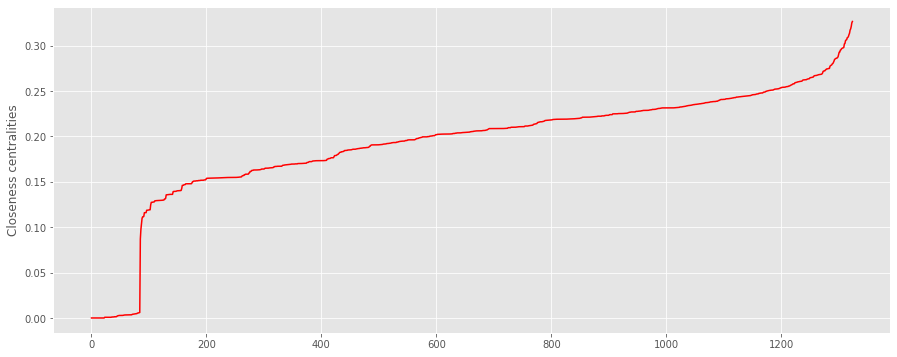

In [26]:
# we shows how closeness centrality values are changing from node to node

xs = sorted_ccent.values()
ys = range(len(xs))

plt.style.use('ggplot')
plt.figure(figsize=(15, 6))
plt.ylabel('Closeness centralities')
plt.plot(ys, xs, color="red")
plt.show()